## **##JAYESH PAWAR / 8668533696 / jjayeshpawar@gmail.com**



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [275]:
from google.colab import files
files.upload()

Saving Sample Survey.xlsx to Sample Survey (1).xlsx


{'Sample Survey.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00u+\xa6R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00u+\xa

In [276]:
ls

 sample_data/  'Sample Survey (1).xlsx'  'Sample Survey.xlsx'


1.Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [331]:
survey=pd.read_excel('Sample Survey.xlsx', sheet_name='Data')

In [332]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


2. How many samples were collected on each day?

In [334]:
survey.groupby('collection_date').size().reset_index(name='counts')

,collection_date,counts
0,2020-08-24,1479
1,2020-08-25,998
2,2020-08-26,598
3,2020-08-27,665
4,2020-08-28,761
5,2020-08-29,620
6,2020-08-30,582
7,2020-08-31,557
8,2020-09-01,607


3. What proportion of the total respondents were aged less than 45?




In [335]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [336]:
survey.age.unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, '24ko', 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67,
       65, 71, 63, 64, 68, 69, 99, 72, 75, 76], dtype=object)

In [337]:
# '24ko' is the odd value present in the age column. lets assume that it 24 yrs. lets convert '24ko' to 24

In [339]:
survey.age=np.where(survey['age']=='24ko',24,survey['age'])

In [340]:
#Data type of age is object. lets convert it to int.
survey.age=survey.age.astype(int)


In [341]:
#Total no of people having age<45:
age_under45=survey[survey.age<45].shape[0]

In [342]:
#Total no of people :
Total=survey.shape[0]

In [343]:
#What proportion of the total respondents were aged less than 45?
age_under45/Total

0.9318479685452162

4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.

In [344]:
bins= [18,25,40,55,100]
labels = ['18-25','25-40','40-55','55+']
survey['age_group'] = pd.cut(survey.age, bins=bins, labels=labels, right=False)

In [345]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


5. How many samples were collected for each age-group? Which age-group had the most samples?

In [346]:
#How many samples were collected for each age-group?
survey.groupby('age_group').size().reset_index(name='counts')

,age_group,counts
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,128


In [347]:
#Which age-group had the most samples?
survey.groupby('age_group').size().index[0]

'18-25'

What proportion of the respondents had opted for the RJD party in both the Vote_Now
and the Past_Vote questions?

In [348]:
voted_for_RJD=survey[(survey.Past_Vote=='RJD') & (survey.Vote_Now=='RJD')].shape[0]

In [349]:
#proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions :
voted_for_RJD/survey.shape[0]

0.1181010630551915

7. For each day of sample collection, determine the proportion of respondents who were
fully satisfied with the performance of the CM. So if there were a total of 1000 samples
on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
would be 0.3.

In [350]:
#Total no of samples each day :
survey.groupby('collection_date').size()

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
dtype: int64

In [352]:
#proportion of respondents who were fully satisfied with the performance of the CM :
survey.groupby(survey[survey['CM_satisfaction']=='Fully Satisfied']['collection_date']).count()['collection_date']/survey.groupby('collection_date').size()

collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
dtype: float64

In [353]:
#2020-08-24:
146/1479 

0.09871534820824882

## **##JAYESH PAWAR / 8668533696 / jjayeshpawar@gmail.com**

8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [355]:
#proportion of respondents that opted fully dissatisfied with their MLA. :
mla_proportion=survey.groupby(survey[survey['MLA_satisfaction']=='Fully Dissatisfied']['collection_date']).count()['collection_date']/survey.groupby('collection_date').size()

In [356]:
mla_proportion

collection_date
2020-08-24    0.599730
2020-08-25    0.631263
2020-08-26    0.590301
2020-08-27    0.606015
2020-08-28    0.607096
2020-08-29    0.564516
2020-08-30    0.620275
2020-08-31    0.576302
2020-09-01    0.634267
dtype: float64

In [357]:
#2020-08-24:L
887/1479

0.5997295469912103

Text(0, 0.5, 'Proportion')

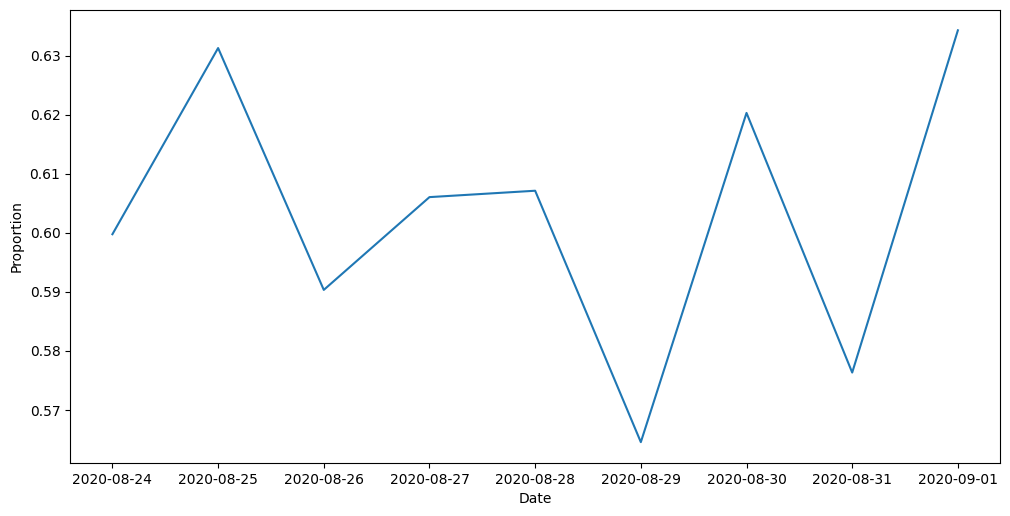

In [360]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)
plt.plot(mla_proportion.index,mla_proportion)
plt.xlabel("Date")
plt.ylabel("Proportion")

9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples.

In [361]:
pd.crosstab(survey.Past_Vote, survey.Vote_Now)

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


10. Repeat the above question with the cell values as the sum of “weight”.

In [362]:
survey.pivot_table(index='Past_Vote', columns='Vote_Now', aggfunc={'weight':sum},fill_value=0)

weight             ...                      
Vote_Now            AAP      AIMIM  ...  Undecided        VIP
Past_Vote                           ...                      
BJP            4.807335   0.349996  ...  41.286954  18.691691
BSP            0.000000   1.654731  ...   0.000000   0.000000
Did not vote   8.865896   5.379527  ...  22.015457  10.696552
HAM            0.312607   0.000000  ...   0.039564   0.000000
INC            0.000000  11.105958  ...   8.558475   0.000000
JAP(L)         0.000000   0.000000  ...   0.000000   0.000000
JD(U)         12.457216  29.198610  ...  58.137833  20.675288
LJP            0.000000   0.000000  ...   1.709409   0.000000
Left Front     0.000000   2.298223  ...   0.000000   3.020887
NOTA           0.000000   1.061204  ...   1.570309   0.000000
Others        13.661335  21.212705  ...   2.504778   0.000000
RJD            5.515847  24.149369  ...  21.523115  13.161145
RLSP           0.000000   0.000000  ...   3.524302   8.258391
VIP            0.000000   0.000000  ...   0.000000   0.372959

[14 rows x 18 columns]

11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group.

In [325]:
df_q11=survey.groupby('age_group').size().reset_index(name='counts')

In [326]:
df_q11

,age_group,counts
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,128


##12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [363]:
df_q12=survey[survey.Vote_Now=='JD(U)'].groupby('age_group').size().reset_index(name='counts')

In [364]:
df_q12

,age_group,counts
0,18-25,181
1,25-40,264
2,40-55,68
3,55+,13


13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group

In [365]:
pd.merge(df_q11, df_q12, on="age_group")

,age_group,counts_x,counts_y
0,18-25,2094,181
1,25-40,3844,264
2,40-55,801,68
3,55+,128,13


In [366]:
## **##JAYESH PAWAR / 8668533696 / jjayeshpawar@gmail.com**